In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [47]:
df = pd.read_excel("1553768847_housing.xlsx")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [48]:
# here we have some missing values 
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Text(0.5, 0, 'Total Bedrooms')

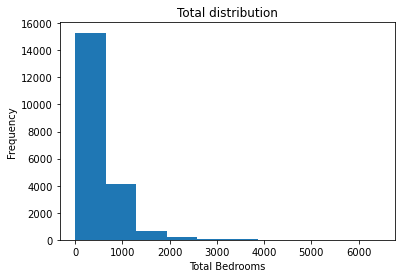

In [49]:
# check the distribution of it , because when i wanna fill it ,
#i don't wanna make a different with the distiribution
df["total_bedrooms"].plot(kind="hist", title="Total distribution")
plt.xlabel("Total Bedrooms")
# after seeing thin , i think the mode will be the good chice to fill 

In [50]:
# fill the missing values 
df["total_bedrooms"].fillna(df["total_bedrooms"].mode()[0], inplace=True)
# check again 
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

Text(0.5, 0, 'Total Bedrooms')

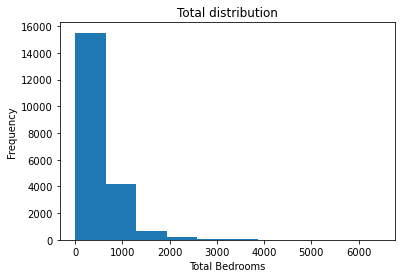

In [51]:
# we can see the distribution again , so there is no big different , which is great
df["total_bedrooms"].plot(kind="hist", title="Total distribution")
plt.xlabel("Total Bedrooms")

In [52]:
#make a copy of the dataset
df_copy = df.copy()

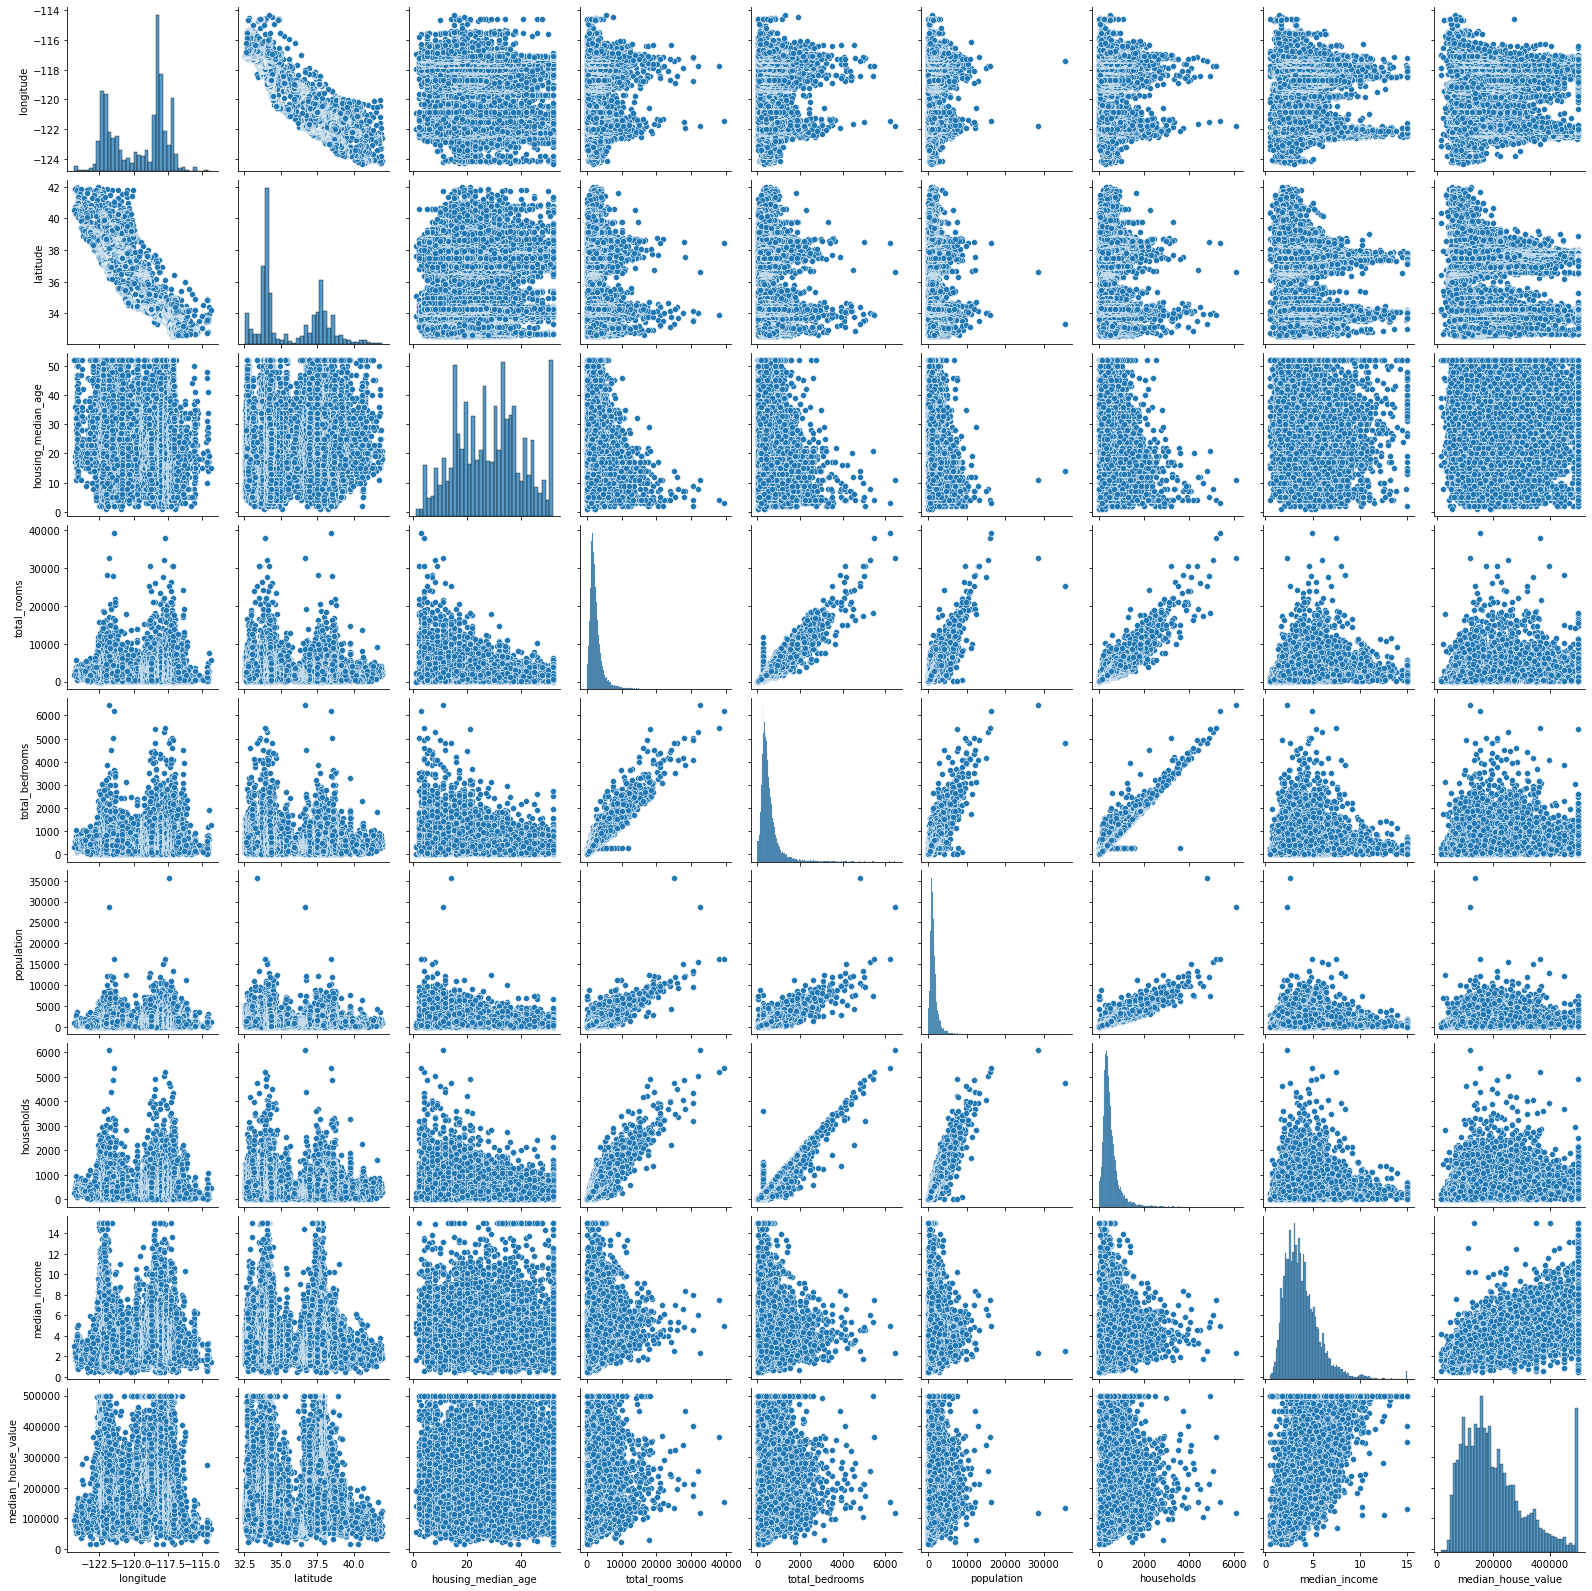

In [53]:
#just to see the relationship
# i can see median_house_value has a positive linear relationship
sns.pairplot(pd.DataFrame(df_copy))

In [54]:
# convert categorical columns to numerical , so we will get dummies data

df_copy = pd.get_dummies(df_copy,columns=["ocean_proximity"], prefix_sep='-')
df_copy

# there is another way with label encoder , but i prefer get dummies 
# le = LabelEncoder()
# df_copy['ocean_proximity']=le.fit_transform(df_copy['ocean_proximity'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity-<1H OCEAN,ocean_proximity-INLAND,ocean_proximity-ISLAND,ocean_proximity-NEAR BAY,ocean_proximity-NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,0,1,0,0,0


In [55]:
# here spliting the data.
train, test= train_test_split(
    df_copy,
#     df_copy.drop(["median_house_value"], axis=1),# drop the target column 
#     df_copy["median_house_value"],# Df with labels
    train_size = 0.8, # size of the train data
    test_size = 0.2, # size of test data
    random_state = 42
)


In [56]:
#Scaling 
# Get column names first
col_names = train.columns

# create scaler object
scaler = StandardScaler()
# fit the training and testing data on it 
train = scaler.fit_transform(train)
test = scaler.transform(test)

train = pd.DataFrame(train, columns=col_names)
test = pd.DataFrame(test, columns=col_names)

In [57]:
# here to make my x, y data

target = "median_house_value"
features = "median_income"

X_train = train[[features]]
y_train = train[[target]]

X_test = test[[features]]
y_test = test[[target]]


In [58]:
#Perform Linear Regression 
#Perform Linear Regression on training data

# Create a model object
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

LinearRegression()

In [59]:
#predict
preds = lr.predict(X_test)

In [60]:
# see the score for the train  
lr.score(X_train,y_train)

0.4769927345820525

In [61]:
# see the score for the test  
lr.score(X_test,y_test)

0.4588591890384667

In [62]:
# root mean squared error (RMSE)
sqrt(mean_squared_error(y_test,preds))

0.728331167096749